# Math Behind Reinforcement Learning (Not for Dummies)

---

**RL : Agent learns to make decision by interaction with an environment, goal of agent is maximize reward overtime.**

## Basic Component :

1. Agent, Learner/decision maker.
2. Environment, Where agent operates.
3. States(s), current situation of environment.
4. Action(a), what can agent do in that state.
5. Reward(r), feedback after that action(+ or -).
6. Policy(π), strategy that agent follow to choose action.
7. Value Action, Predict how good a state, in term of future r.

---

## Markov Decision Process (MDP)

![](https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Bellman-Equation.png?ssl=1)

MDP models the environment with this element:

1. State (S)
2. Action (A)
3. Transition Probabilities (P) = P(s'|s,a) : The probability of moving to state s' after taking action a in state s.
4. Reward Funtion (R) = R(s,a) : Expected reward for each state and action
5. Discount Factor (γ) : how much future rewards are worth to immediate ones (0 < γ < 1).

**The Markov Property** : The next state and reward depend only on the current state and action, not on full history.

**Goal of RL** : 

*"Find the expected value ( policy π(a|s) ) that maximizes the expected cumulative reward over time, also called the return"*

---

## Transition Probability

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*VmV-tIr2e1eX24Y_0KMi5w.png)


**Transition Probability tells that :**

*"if you are in certain situation (state i) and take a certain action. whats the chance you will end up in another situation (next state i+1...)"*

or 

*"If im here and do this, how likely it is making me end up there"*

**for example.**

- you are in a terminal batoh(si) 
- taking bus (ai)
- youre likely 90% probability will go to terminal darussalam(si+1)
- and 30% in terminal ulelue(si+2).
- That 90% probability is transition probabilty p(si+1 | si,ai). 


**But why?..**

Let’s say your RL agent is a robot in a room:

- State s: robot is in the center
- Action a: move north
- New state s’:
- 80% chance: ends up one step north
- 20% chance: slips and stays in place

*"The agent needs to learn that “move north” doesn’t always succeed — this randomness is captured in p(s’|s,a)."*




----

## Return

**Random Variable :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FdQcldGubZNbfJRrh1GO8g.png)



**Return (Random Variable with Discounted Rate) :**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZEtDC9eBwSVsQ8_jtnuudg.png)

**Return tells that :**

*"the total reward agent gets from time t onward"*

- γ (gamma) ∈ [0, 1]
- Closer to 1 = future matters more
- Closer to 0 = only cares about immediate reward


**Why?**

*agent goal is maximize Gt, since it tells total reward agent has, and we want to maximize this reward*

**For example..**
- each coin = reward
- Gt = total coins from now until game ends
- Choise :
- stay and get 1 coin
- risk more for now and get 10 coin later
- Gt is there for decide that choise.


*"We model terms like return and value as random variables because the environment is unpredictable — the same action doesn’t always give the same result."*

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*AXQRwn5toJQXcJsBZ8HqMg.png)

---

so, when we goes from state s to next state s' by taking action a. the reward r it gets is not always the same.

*"Reward comes from an unknown distribution - random"*

instead if relying on one time reward, we compute :

![](https://miro.medium.com/v2/resize:fit:640/format:webp/1*6bnA-TulIcQDiRH_7_sBRg.png)

or

the expected reward : E[r | s, a, s’] 

*"the average of all possible rewards for that transition."*

for example ..

- at casino
- pull a lever (action a) many time
- each time, even the a is same, reward might be different. (5 coin, 10 coin, and even 0)

*'we didnt know exact reward we get next, but overtime, we can estimate'*

- on average, the lever (action a) gives me 6 coin, so thats 6 coin is our expected reward.

*"reward now and next reward in same action over time is being averaged"*

---

## State Value Function 

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IYC5S0lG7ov-surZ9wwMfg.png)

*"How good s is considering future reward(γ)"*

take a not that π is a policy that agent need to follow, for example taking a bus in a terminal (s), policy is like 50% end up in s1, and 50% end up in s2. What we want to do is calculate expactation of every possible reward output following that policy.



---

## State Value Function

![](https://miro.medium.com/v2/resize:fit:1112/format:webp/1*7W4D6K3VtzNR7RT_y-ijmg.png)

*"How good a is considering reward by taking a action in s"*


---

## Expected Return

In reinforcement learning (RL), we are trying to predict future rewards based on current states and actions. This involves a lot of expectation calculations because rewards are not deterministic — they depend on probabilities (transition, randomness, policy, etc.).


Case : Frozen Lake Semplify

1. Environment

S  F  F  F  
F  H  F  H  
F  F  F  H  
H  F  F  G

2. State (S)

- S0 : Start
- S1, S2, S3, S4, S6, S8, S9, S10, S13, S14 : Frozen (Safe)
- S5, S7, S11, S12 : Hole (-1)
- S15 : Goal (+1)

3. Action (A)

- Up (0)
- Right (1)
- Down (2)
- Left (3)

Act

S = S10 (Safe)

A = 1

S' = S11 (Holes)

R = -1




**Expectation (Average)**

![](https://miro.medium.com/v2/resize:fit:750/format:webp/1*dMkX_6HSWMvp87cy-r5f9A.png)

*"Average Outcomes, but weighted by how likely each outcome is"*

Ex. 

- Let’s say you always go outside.
- E[X] = What’s the expected reward?


**Joint Probability**

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*D9MvLB64amhPcIqmcq1Vbg.png)

*"Whats the Probability both Happen?"*


![](https://miro.medium.com/v2/resize:fit:1110/format:webp/1*f8Smz6vvlrR3NVgcsiMn4A.png)

ex.

- it being rainy and you go outside?

**Marginal Probability**

*"Whats the Probability of Just One no matter what the other is?"*

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*MzDo4o_BThIAtkMacs8S7g.png)

and 

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*GbBm8DHKPP7D9OqqHXPb9w.png)

**Conditional Probability**

*"Whats the chance of X = x given Y = y happened? "*perhit

![](https://miro.medium.com/v2/resize:fit:1288/format:webp/1*RXhrdunWTXL7GTVJP1GR0w.png)

**Value Funtion & Q Funtion**

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*uUo6Dvww9RoU5ui4AjQ-Sw.png)  

---

## State Value Function 

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IYC5S0lG7ov-surZ9wwMfg.png)

**State Value Function tells that :**

*"How good is for the agent to be in a state s, assuming it follow policy π or rule."*

or 

*"Start from state s, than Follow policy π, Then compute the expected return (Gₜ) — the sum of rewards you’ll likely get = How Good that State Is.."*

**for example ..**

**State (S):**
- S1 = Kitchen
- S2 = Living Room
- S3 = Charging Station

**Action (A):**
- A1 = Walk
- A2 = Clean
- A3 = Charge

**Reward (R):**
- Cleaning = +10
- Walking = -1
- Charging = +5


**T = 0 ...**


**State :**

- S2 (Living Room)

**Policy π :**
- 50% chance choose clean (A2)
- 50% change choose walk (A1) to kitchen (S1)


**Randomness :**
- if choose walk (A1), there is a 20% chance the robot slips and ends up Charging Station (S3)

so :

- transition (p(s'|s,a)) is not guaranteed when played.
- reward will differ depending on where it lands.


**The Question is :**

*"How good is the Living Room (S2)"*

which is :

State Value Function (Vπ(S2))


**How we determine how good a state is? :**

1. From s (s2 : Kitchen), robot follows policy π.

2. Transition Probability :
-  50% clean (A2) = (+10 reward)
-  50% walk (A1) = (random outcome) :
  
    -  80% kitchen (S1) (then can Clean (A2) next = +10 future reward)
    -  20% Charging Station (S3) (Charge (A3) = +5 reward)
   
3. Each path give different total reward (Gt).

Since Transition & Reward is uncertain or random,  we :

*"Take the average of all these possible outcomes or reward (Gt)"*

or 

*"How good the state (S) Living Room (S2) is"*

which is :

State Value Function : Vπ(S2) = E[Gₜ | s = S2]

or

*"Expected total reward from State s (S2) follow policy π"*





---

## Example.

Environment:


\begin{bmatrix}
🤖 & ⬜ & ⬜ & ⬜ & ⬜ \\
⬜ & 🕳 & ⬜ & ⬜ & 🕳 \\
⬜ & ⬜ & ⬜ & ⬜ & 🕳 \\
⬜ & ⬜ & ⬜ & ⬜ & ⬜ \\
🕳 & ⬜ & ⬜ & ⬜ & 🏁 \\
\end{bmatrix}


Keterangan:
- 🤖 = Start (1,1)
- 🕳 = Hole (jatuh = game over)
- 🏁 = Goal (finish)
- ⬜ = Safe (jalan beku)


Main Goal : Reward Tertinggi

Main Process :

1. Define State and Action (S dan A)

2. Define Reward and Transition Probabilities (R dan P(s'|s,a))

3. Value Initialization

4. Value Iteration

5. Q Value

6. Policy Extraction (Optimum Policy)


---

### State

every grid as state (5x5) then, 25 state


\begin{bmatrix}
  0 (🤖) & 1 (⬜) & 2 (⬜) & 3 (⬜) & 4 (⬜) \\
  5 (⬜) & 6 (🕳) & 7 (⬜) & 8 (⬜) & 9 (🕳) \\
 10 (⬜) & 11 (⬜) & 12 (⬜) & 13 (⬜) & 14 (🕳) \\
 15 (⬜) & 16 (⬜) & 17 (⬜) & 18 (⬜) & 19 (⬜) \\
 20 (🕳) & 21 (⬜) & 22 (⬜) & 23 (⬜) & 24 (🏁) \\
\end{bmatrix}

State :

- Start: state 0 (1,1)
- Goal: state 24 (5,5)
- Holes: state 6 (2,2), 9 (2,5), 14 (3,5), 20 (5,1)
- Else : Common

### Action

Move :

- Up (U)
- Down (D)
- Left (L)
- Right (R)

Probability every action :

- Success to that direction
- Fail end end up to wrong direction (Assume Slippery)



---

### Rewards :

> Assume Environtment not Slippery so every action is deterministik (can we control)

Reward :
- Reward = 1 if reach the goal S24(5,5)
- Reward = 0 for common move (State Common)
- Reward = 0 or -1 if enter holes (for now 0)

### Transition Function (P(s'|s,a))

*"probability end up in s' if in s take a"*

> Assume Environtment not Slippery so every action is deterministik (can we control)

In [57]:
import pandas as pd
df = pd.read_csv("assets/state_transitions.csv")
df.head(10)

,state,action,next_state,probability
0,"0(1,1)",up,-,-
1,"0(1,1)",down,"5(2,1)",1
2,"0(1,1)",left,-,-
3,"0(1,1)",right,"1(1,2)",1
4,"1(1,2)",up,-,-
5,"1(1,2)",down,"6(2,2)",1
6,"1(1,2)",left,"0(1,1)",1
7,"1(1,2)",right,"2(1,3)",1
8,"2(1,3)",up,-,-
9,"2(1,3)",down,"7(2,3)",1


---

### Value Initialization

*"How Good being in That State Considering Reward that Can Get in the Future"*

Step :
1. Initialize each State (except goal and holes). (Vs = 0), reward = 0. because we didnt know future reward yet
2. S24 (Goal) (5,5) -> V(S24) = 1, reward = 1.
3. (s6, s9, s14, s20) (Holes) -> V(s) = -1, reward = -1.

In [80]:
import pandas as pd
df = pd.read_csv("assets/v_values.csv")
df.tail(10)

,state,V(s)
15,"S15(3,0)",0.0
16,"S16(3,1)",0.0
17,"S17(3,2)",0.0
18,"S18(3,3)",0.0
19,"S19(3,4)",0.0
20,"S20(4,0)",-1.0
21,"S21(4,1)",0.0
22,"S22(4,2)",0.0
23,"S23(4,3)",0.0
24,"S24(4,4)",1.0


### Value Iteration (Bellman Equation)

*"Update Each Values V(S) Based on Transition Funtion value we Defined Earlier"*

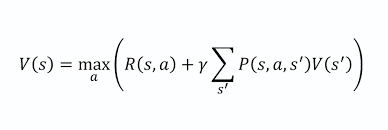

Where :

- R(s,a) : reward in state s, after taking action a. (Value initialization).
- P(s'|s,a) : Transition function , probability end up in s' if in s take a.
- V(s') : state s' value used to calculate s value.

Assuming ( gamma = 1), meaning reward now and later will be the same. short term


Iteration  : 

*"choosing the best action that maximize the V(s) each state"*

or

*"How Good being in That State Considering Reward that Can Get in the Future"*


#### First Iteration  :

*"Updating Value of a state considering each action and the reward can get, long term and short term"*

1. Start (S0) (1,1) :
- . Possible Action :
   - Rigth -> (S1) (1,2)
   - Left -> 0
   - Up -> 0
   - Down -> (S5) (2,1)

- V(S0) = R(S0,Right) + γ(P(S1|S0, Right).V(S1) + γ(P(S5|S0, Down)).V(S5)

- V(S0) = 0 + 1(1 x 0, 1 x 0) = 0


2 ..
..
.

...

#### Ninth Iteration : 

....

In [94]:
import pandas as pd
df = pd.read_csv("assets/value_iteration.csv")
df

,State,0,1,2,3,4,5,6,7,8,9
0,"S0(1,1)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,0.0000,0.9088,0.9088
1,"S1(1,2)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
2,"S2(1,3)",0.0,0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
3,"S3(1,4)",0.0,0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
4,"S4(1,5)",0.0,0.0,0.00,0.000,0.0000,0.0000,1.1219,1.1219,1.1219,1.1219
5,"S5(2,1)",0.0,0.0,0.00,0.000,0.0000,0.0000,0.0000,1.0097,1.0097,1.0097
6,"S6(2,2)",-1.0,-1.0,-1.00,-1.000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000
7,"S7(2,3)",0.0,0.0,0.00,0.000,0.0000,1.2466,1.2466,1.2466,1.2466,1.2466
8,"S8(2,4)",0.0,0.0,0.00,0.000,1.3851,1.3851,1.3851,1.3851,1.3851,1.3851
9,"S9(2,5)",-1.0,-1.0,-1.00,-1.000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000


### Value Iteration Each State in HeatMaps

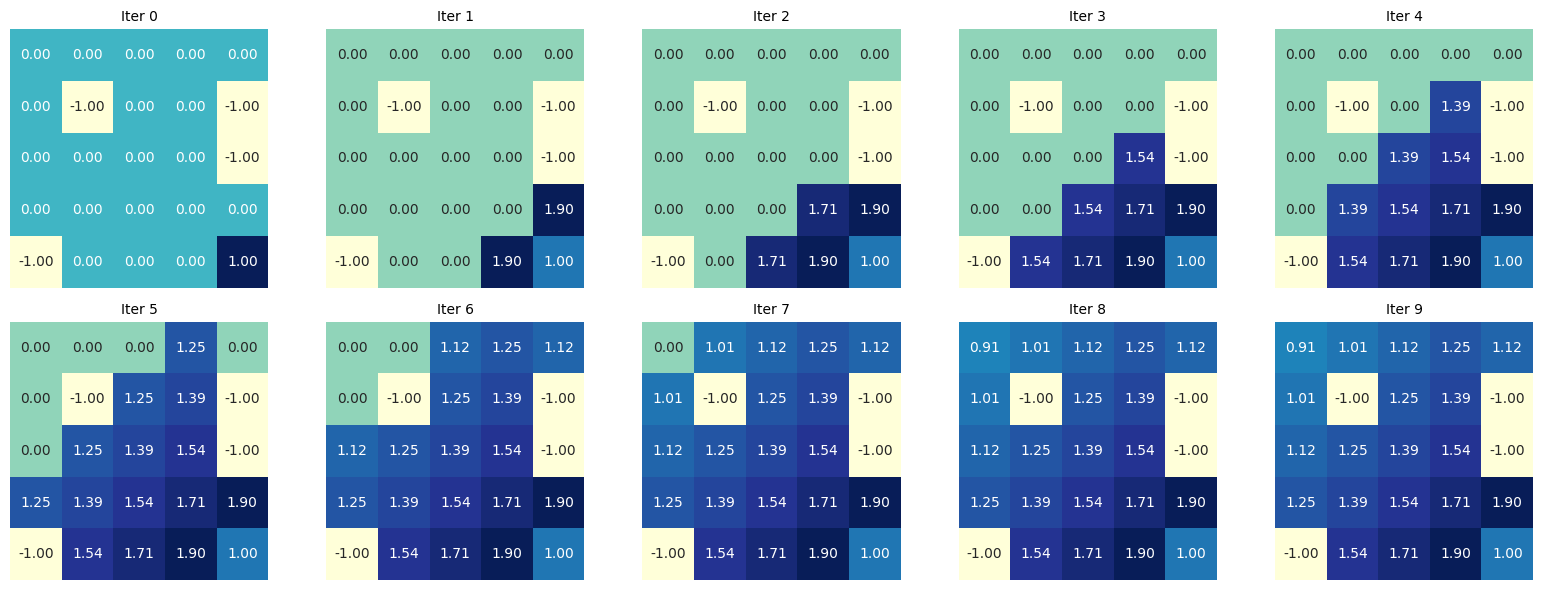

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the value iteration result
df = pd.read_csv("assets/value_iteration.csv", index_col=0)

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(16, 6))
for ax, col in zip(axes.flat, df.columns):
    sns.heatmap(df[col].values.reshape(5, 5), annot=True, cmap='YlGnBu', fmt='.2f',
                cbar=False, xticklabels=False, yticklabels=False, square=True, ax=ax)
    ax.set_title(f'Iter {col}', fontsize=10)

plt.tight_layout()
plt.show()

## Policy Extraction

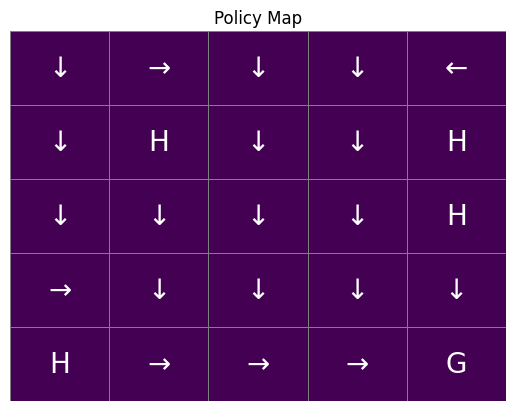

In [107]:
# Policy extraction
directions = {'up': '↑', 'down': '↓', 'left': '←', 'right': '→'}
policy = []
for s in range(25):
    if s == goal_state:
        policy.append('G')
    elif s in hole_states:
        policy.append('H')
    else:
        best = max(actions, key=lambda a: (1 if (n := get_next_state(s, a)) == goal_state else -1 if n in hole_states else 0) + gamma * V[n])
        policy.append(directions[best])

# Visualize policy
policy_grid = np.array(policy).reshape(5, 5)
sns.heatmap(np.zeros((5, 5)), cbar=False, annot=policy_grid, fmt='', 
            annot_kws={"size": 20}, linewidths=0.5, linecolor='gray', cmap='viridis')
plt.title("Policy Map")
plt.axis('off')
plt.show()

## Q Learning

*"not require the transition probabilities or the reward function explicitly"*